In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.ensemble import GradientBoostingClassifier

/Users/ClumsyJace/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ClumsyJace/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
churntrain = pd.read_csv('churn_train.csv')
churntest = pd.read_csv('churn_test.csv')

In [3]:
churntrain.head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0
5,14.51,5.0,NaN,1.00,Astapor,2014-04-22,iPhone,2014-01-29,0.0,0,True,100.0
6,4.87,4.7,4.0,1.00,Astapor,2014-04-21,Android,2014-01-18,0.0,0,False,66.7
7,1.78,4.0,5.0,1.00,Winterfell,2014-01-12,iPhone,2014-01-11,0.0,3,False,0.0
8,6.87,5.0,4.7,1.00,Astapor,2014-01-30,Android,2014-01-01,0.0,3,False,66.7
9,2.41,5.0,3.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,1,False,100.0


In [4]:
churntrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [5]:
churntrain.last_trip_date.unique()

array(['2014-05-03', '2014-01-26', '2014-05-21', '2014-01-10',
       '2014-05-13', '2014-04-22', '2014-04-21', '2014-01-12',
       '2014-01-30', '2014-01-29', '2014-01-19', '2014-05-12',
       '2014-06-28', '2014-01-16', '2014-05-30', '2014-05-15',
       '2014-04-13', '2014-03-06', '2014-01-15', '2014-02-17',
       '2014-06-09', '2014-05-23', '2014-06-14', '2014-03-30',
       '2014-06-26', '2014-06-22', '2014-06-01', '2014-06-29',
       '2014-06-19', '2014-06-10', '2014-05-29', '2014-01-25',
       '2014-01-03', '2014-06-21', '2014-03-02', '2014-01-21',
       '2014-06-07', '2014-02-23', '2014-05-01', '2014-06-12',
       '2014-03-08', '2014-04-10', '2014-03-10', '2014-05-25',
       '2014-04-27', '2014-05-05', '2014-01-27', '2014-06-30',
       '2014-06-27', '2014-03-18', '2014-01-13', '2014-05-18',
       '2014-05-31', '2014-05-08', '2014-05-19', '2014-05-17',
       '2014-02-09', '2014-04-06', '2014-05-04', '2014-06-08',
       '2014-06-13', '2014-04-12', '2014-02-07', '2014-

In [6]:
churntrain['last_trip_date'].dtypes

dtype('O')

In [7]:
churntrain['last_trip_date'] = pd.to_datetime(churntrain['last_trip_date'])
churntrain['signup_date'] = pd.to_datetime(churntrain['signup_date'])

In [8]:
churntrain.dtypes

avg_dist                         float64
avg_rating_by_driver             float64
avg_rating_of_driver             float64
avg_surge                        float64
city                              object
last_trip_date            datetime64[ns]
phone                             object
signup_date               datetime64[ns]
surge_pct                        float64
trips_in_first_30_days             int64
luxury_car_user                     bool
weekday_pct                      float64
dtype: object

In [9]:
churntrain['active_flag'] = np.where(churntrain['last_trip_date']>='2014-06-01', 'active', 'not active')

In [10]:
churntrain.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active_flag
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,not active
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,not active
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,not active
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,not active
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,not active


In [11]:
churntrain.active_flag.value_counts()

not active    24968
active        15032
Name: active_flag, dtype: int64

In [12]:
misscol = pd.DataFrame(churntrain.isnull().sum()/len(churntrain)*100).reset_index()
misscol.columns = [['column_name', 'percentage']]
misscol

,column_name,percentage
0,avg_dist,0.0000
1,avg_rating_by_driver,0.4050
2,avg_rating_of_driver,16.3200
3,avg_surge,0.0000
4,city,0.0000
5,last_trip_date,0.0000
6,phone,0.7975
7,signup_date,0.0000
8,surge_pct,0.0000
9,trips_in_first_30_days,0.0000


#### dropping last_trip_date from dataframe

In [13]:
churntrain = churntrain.drop(['last_trip_date'], axis=1)
churntrain = churntrain.drop(['signup_date'], axis=1)

### Preprocessing - Dealing with missing data

In [14]:
churntrain.fillna(churntrain.median(), inplace=True)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active_flag
0,6.94,5.0,5.0,1.00,Astapor,Android,0.0,0,False,100.0,not active
1,8.06,5.0,5.0,1.00,Astapor,Android,0.0,2,True,0.0,not active
2,21.50,4.0,4.9,1.00,Winterfell,iPhone,0.0,1,True,100.0,not active
3,9.46,5.0,4.9,2.75,Winterfell,Android,100.0,1,False,100.0,not active
4,13.77,5.0,4.9,1.00,Winterfell,iPhone,0.0,0,False,100.0,not active
5,14.51,5.0,4.9,1.00,Astapor,iPhone,0.0,0,True,100.0,not active
6,4.87,4.7,4.0,1.00,Astapor,Android,0.0,0,False,66.7,not active
7,1.78,4.0,5.0,1.00,Winterfell,iPhone,0.0,3,False,0.0,not active
8,6.87,5.0,4.7,1.00,Astapor,Android,0.0,3,False,66.7,not active
9,2.41,5.0,3.0,1.00,Winterfell,iPhone,0.0,1,False,100.0,not active


In [15]:
churntrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
phone                     39681 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
active_flag               40000 non-null object
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [16]:
churntrain.phone.unique()

array(['Android', 'iPhone', nan], dtype=object)

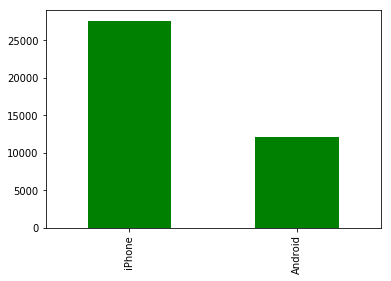

In [17]:
churntrain['phone'].value_counts().plot(kind='bar',color="green")
plt.show()

In [18]:
churntrain.phone.replace(np.nan, 'iPhone', inplace=True)
churntrain.phone.unique()

array(['Android', 'iPhone'], dtype=object)

In [19]:
# churntrain.city.hist(bins=100)
# plt.show()

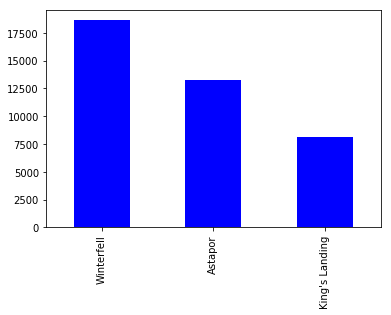

In [20]:
churntrain['city'].value_counts().plot(kind='bar',color="blue")
plt.show()

In [21]:
# d = pd.read_csv('runs.csv')
# score_india = d['score_india']
# legend = ['India', 'Pakistan']
# score_pk = d['score_pk']
# plt.hist([score_india, score_pk], color=['orange', 'green'])
# plt.xlabel("Runs/Delivery")
# plt.ylabel("Frequency")
# plt.legend(legend)
# plt.xticks(range(0, 7))
# plt.yticks(range(1, 20))
# plt.title('Champions Trophy 2017 Final\n Runs scored in 3 overs')
# plt.show()

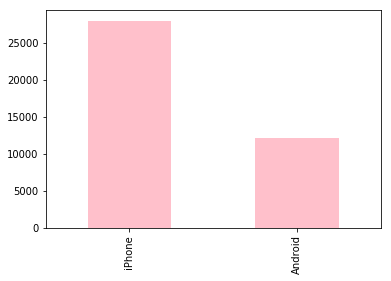

In [22]:
churntrain['phone'].value_counts().plot(kind='bar',color="pink")
plt.show()

### Preprocessing - Label Encoding

In [23]:
list(churntrain)

['avg_dist',
 'avg_rating_by_driver',
 'avg_rating_of_driver',
 'avg_surge',
 'city',
 'phone',
 'surge_pct',
 'trips_in_first_30_days',
 'luxury_car_user',
 'weekday_pct',
 'active_flag']

In [24]:
churntrain.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active_flag
0,6.94,5.0,5.0,1.00,Astapor,Android,0.0,0,False,100.0,not active
1,8.06,5.0,5.0,1.00,Astapor,Android,0.0,2,True,0.0,not active
2,21.50,4.0,4.9,1.00,Winterfell,iPhone,0.0,1,True,100.0,not active
3,9.46,5.0,4.9,2.75,Winterfell,Android,100.0,1,False,100.0,not active
4,13.77,5.0,4.9,1.00,Winterfell,iPhone,0.0,0,False,100.0,not active


In [25]:
churntrain.city.unique()

array(['Astapor', 'Winterfell', "King's Landing"], dtype=object)

In [26]:
churntrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
phone                     40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
active_flag               40000 non-null object
dtypes: bool(1), float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [27]:
import copy

In [28]:
churntrain_processed = copy.deepcopy(churntrain)

In [29]:
churntrain_processed.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,phone,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active_flag
0,6.94,5.0,5.0,1.00,Astapor,Android,0.0,0,False,100.0,not active
1,8.06,5.0,5.0,1.00,Astapor,Android,0.0,2,True,0.0,not active
2,21.50,4.0,4.9,1.00,Winterfell,iPhone,0.0,1,True,100.0,not active
3,9.46,5.0,4.9,2.75,Winterfell,Android,100.0,1,False,100.0,not active
4,13.77,5.0,4.9,1.00,Winterfell,iPhone,0.0,0,False,100.0,not active


In [30]:
churntrain_processed = pd.get_dummies(data=churntrain_processed, columns=['city', 'phone'])

In [31]:
churntrain_processed.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active_flag,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,6.94,5.0,5.0,1.00,0.0,0,False,100.0,not active,1,0,0,1,0
1,8.06,5.0,5.0,1.00,0.0,2,True,0.0,not active,1,0,0,1,0
2,21.50,4.0,4.9,1.00,0.0,1,True,100.0,not active,0,0,1,0,1
3,9.46,5.0,4.9,2.75,100.0,1,False,100.0,not active,0,0,1,1,0
4,13.77,5.0,4.9,1.00,0.0,0,False,100.0,not active,0,0,1,0,1


In [32]:
churntrain_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      40000 non-null float64
avg_rating_of_driver      40000 non-null float64
avg_surge                 40000 non-null float64
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
active_flag               40000 non-null object
city_Astapor              40000 non-null uint8
city_King's Landing       40000 non-null uint8
city_Winterfell           40000 non-null uint8
phone_Android             40000 non-null uint8
phone_iPhone              40000 non-null uint8
dtypes: bool(1), float64(6), int64(1), object(1), uint8(5)
memory usage: 2.7+ MB


### Preprocessing - Feature Scalling

In [33]:
churntrain_processed.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000
mean,5.791302,4.778335,4.650380,1.074956,8.857342,2.280700,60.874382,0.330900,0.20360,0.465500,0.301325,0.698675
std,5.708056,0.447403,0.573109,0.222427,20.014008,3.811289,37.089619,0.470543,0.40268,0.498815,0.458839,0.458839
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.500000,1.000000,0.000000,0.000000,33.300000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,6.930000,5.000000,5.000000,1.050000,8.300000,3.000000,100.000000,1.000000,0.00000,1.000000,1.000000,1.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [34]:
scaler = RobustScaler()
churntrain_processed[['avg_dist', 'avg_surge','surge_pct','trips_in_first_30_days','weekday_pct']] = scaler.fit_transform(churntrain_processed[['avg_dist', 'avg_surge','surge_pct','trips_in_first_30_days','weekday_pct']])

In [35]:
churntrain_processed.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.00000,40000.000000,40000.000000,40000.000000
mean,0.423792,4.778335,4.650380,1.499115,1.067150,0.426900,-0.087341,0.330900,0.20360,0.465500,0.301325,0.698675
std,1.265644,0.447403,0.573109,4.448535,2.411326,1.270430,0.556066,0.470543,0.40268,0.498815,0.458839,0.458839
min,-0.860310,1.000000,1.000000,0.000000,0.000000,-0.333333,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-0.323725,4.700000,4.500000,0.000000,0.000000,-0.333333,-0.500750,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,4.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,0.676275,5.000000,5.000000,1.000000,1.000000,0.666667,0.499250,1.000000,0.00000,1.000000,1.000000,1.000000
max,34.829268,5.000000,5.000000,140.000000,12.048193,41.333333,0.499250,1.000000,1.00000,1.000000,1.000000,1.000000


In [36]:
churntrain_processed.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active_flag,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,0.678492,5.0,5.0,0.0,0.000000,-0.333333,False,0.49925,not active,1,0,0,1,0
1,0.926829,5.0,5.0,0.0,0.000000,0.333333,True,-1.00000,not active,1,0,0,1,0
2,3.906874,4.0,4.9,0.0,0.000000,0.000000,True,0.49925,not active,0,0,1,0,1
3,1.237251,5.0,4.9,35.0,12.048193,0.000000,False,0.49925,not active,0,0,1,1,0
4,2.192905,5.0,4.9,0.0,0.000000,-0.333333,False,0.49925,not active,0,0,1,0,1


### Feature Importance

In [37]:
churntrain_processed.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,active_flag,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,0.678492,5.0,5.0,0.0,0.000000,-0.333333,False,0.49925,not active,1,0,0,1,0
1,0.926829,5.0,5.0,0.0,0.000000,0.333333,True,-1.00000,not active,1,0,0,1,0
2,3.906874,4.0,4.9,0.0,0.000000,0.000000,True,0.49925,not active,0,0,1,0,1
3,1.237251,5.0,4.9,35.0,12.048193,0.000000,False,0.49925,not active,0,0,1,1,0
4,2.192905,5.0,4.9,0.0,0.000000,-0.333333,False,0.49925,not active,0,0,1,0,1


In [38]:
features = churntrain_processed.drop(["active_flag"], axis=1).columns
features

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'luxury_car_user', 'weekday_pct',
       'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone'],
      dtype='object')

In [39]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(churntrain_processed[features].values, churntrain_processed["active_flag"].values)
feature_importance = rnd_clf.feature_importances_

In [40]:
for name, score in zip(features, feature_importance):
        print(name, score)

avg_dist 0.302619153023
avg_rating_by_driver 0.112933100871
avg_rating_of_driver 0.0795249239139
avg_surge 0.066175953592
surge_pct 0.081245104189
trips_in_first_30_days 0.0806074308659
luxury_car_user 0.0323286086334
weekday_pct 0.131922418447
city_Astapor 0.0162569440667
city_King's Landing 0.047371460099
city_Winterfell 0.0111828758313
phone_Android 0.0194094889469
phone_iPhone 0.0184225375201


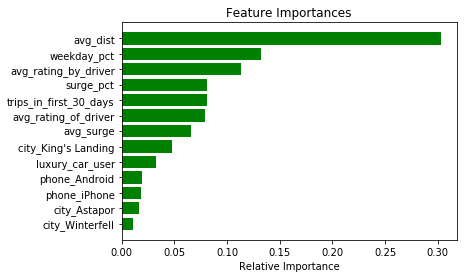

In [41]:
indices = np.argsort(feature_importance)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='g', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [58]:
X = churntrain_processed.drop(["active_flag"], axis=1)
y = churntrain_processed['active_flag']

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [65]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [444]:
y.head()

0    not active
1    not active
2    not active
3    not active
4    not active
Name: active_flag, dtype: object

In [427]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
scores_rnd = cross_val_score(rnd_clf,X,y,cv=5)
scores_rnd

array([ 0.7560305 ,  0.75765529,  0.765     ,  0.76022003,  0.75259407])

In [432]:
logreg = linear_model.LogisticRegression(C=1e5)
scores_log = cross_val_score(logreg,X,y,cv=5)
scores_log

array([ 0.71791026,  0.72153481,  0.723375  ,  0.71821478,  0.72121515])

In [434]:
svm = SVC()
scores_svm = cross_val_score(svm,X,y,cv=5)
scores_svm

array([ 0.75915511,  0.76415448,  0.7655    ,  0.75659457,  0.76184523])

In [ ]:
svm_clf = SVC(kernel='poly', degree=3, coef0=1, C=5)
svm_ply_scores = cross_val_score(svm_clf, X, y, cv=5)
svm_ply_scores

In [437]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                         algorithm="SAMME",
                         n_estimators=200)
scores_ada = cross_val_score(ada,X,y,cv=5)
scores_ada

array([ 0.78540182,  0.78227722,  0.78975   ,  0.77872234,  0.78209776])

In [441]:
params = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.01, 'min_samples_leaf': 1, 'random_state': 3}

gb = ensemble.GradientBoostingClassifier(**params)

scores_gb = cross_val_score(gb,X,y,cv=5)
scores_gb

array([ 0.78902637,  0.79077615,  0.793875  ,  0.78484811,  0.78734842])

In [442]:
np.mean(scores_gb)

0.78917480984999711

In [72]:
param_test3 = {'min_samples_split':list(range(1000,2100,200)), 'min_samples_leaf':list(range(30,71,10))}

In [79]:
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3,scoring= 'accuracy', n_jobs=4,iid=False, cv=5)

In [80]:
gsearch3.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=9,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'min_samples_split': [1000, 1200, 1400, 1600, 1800, 2000], 'min_samples_leaf': [30, 40, 50, 60, 70]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [81]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.78850, std: 0.00317, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.78902, std: 0.00233, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.78807, std: 0.00331, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.78780, std: 0.00326, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.78830, std: 0.00234, params: {'min_samples_leaf': 30, 'min_samples_split': 1800},
  mean: 0.78737, std: 0.00354, params: {'min_samples_leaf': 30, 'min_samples_split': 2000},
  mean: 0.78825, std: 0.00295, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.78755, std: 0.00231, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.78857, std: 0.00375, params: {'min_samples_leaf': 40, 'min_samples_split': 1400},
  mean: 0.78715, std: 0.00286, params: {'min_samples_leaf': 40, 'min_samples_split': 1600},
  mean: 0.78822, std: 0.00281, params: {'min_samples_leaf': 40, 'min_samples_spl

In [71]:
y

array([1, 1, 1, ..., 0, 1, 0])